# Imports

In [ ]:
!pip3 install pandas numpy nltk matplotlib git+https://github.com/gmum/pykernels.git

  Cloning https://github.com/gmum/pykernels.git to /tmp/pip-req-build-t3gszyrm
  Running command git clone -q https://github.com/gmum/pykernels.git /tmp/pip-req-build-t3gszyrm


In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

True

In [ ]:
# Imports

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string as st
import re
from nltk import PorterStemmer, WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score, average_precision_score, precision_recall_curve, confusion_matrix, ConfusionMatrixDisplay, PrecisionRecallDisplay
from sklearn.preprocessing import label_binarize, LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, classification_report, balanced_accuracy_score
from sklearn.model_selection import GridSearchCV

In [ ]:
# Read the data. Here it is already in .csv format.
data = pd.read_json('/path/to/directory/News_Category_Dataset_v2.json', lines=True)
data.head(10)

In [ ]:
categories = ['POLITICS', 'WELLNESS', 'ENTERTAINMENT', 'TRAVEL', 'STYLE & BEAUTY']
data = data.loc[data['category'].isin(categories)]
data = data.reset_index(drop=True)
data

,category,headline,authors,link,short_description,date
0,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26
1,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26
2,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26
3,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26
4,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...,Ron Dicker,https://www.huffingtonpost.com/entry/morgan-fr...,"""It is not right to equate horrific incidents ...",2018-05-26
...,...,...,...,...,...,...
86155,TRAVEL,Tea Time Beneath The Western Ghats (PHOTOS),"Stefani Jackenthal, Contributor\nAdventure Tra...",https://www.huffingtonpost.com/entry/post_us_5...,"As we stepped out of the serene plantation, we...",2012-01-28
86156,WELLNESS,This Is Only the Beginning: Surprising Advice ...,"Ellie Knaus, Contributor\nAtomic Moms Podcast ...",https://www.huffingtonpost.com/entry/life-tips...,"My great-aunt Ida loves to say, ""This is only ...",2012-01-28
86157,STYLE & BEAUTY,Cheryl Tiegs In A Sauna: A Look Back,Sarah Leon,https://www.huffingtonpost.com/entry/cheryl-ti...,"""A Look Back"" is a daily column that highlight...",2012-01-28
86158,ENTERTAINMENT,"Sundance, Ice-T, and Shades of the American Ra...","Courtney Garcia, Contributor\nI tell stories a...",https://www.huffingtonpost.com/entry/sundance-...,Representation of the collective diaspora has ...,2012-01-28


# Text cleaning and processing steps

The next steps were followed to clean the text in the headline column:

1.   Convert all the text into lower case.
2.   Remove punctuations.
2.   Convert text into tokens.
3.   Remove stopwords using NLTK corpus stopwords list to match them.
4.   Apply lemmatization.
5.   Convert words to feature vectors.

In [ ]:
# Remove all punctuations from the text

def remove_punct(text):
    return ("".join([ch for ch in text if ch not in st.punctuation]))

In [ ]:
# Convert text to lower case tokens
def tokenize(text):
    text = re.split('\s+' ,text)
    return [x.lower() for x in text]

In [ ]:
# Remove tokens of length less than 3
def remove_small_words(text):
    return [x for x in text if len(x) > 3 ]

In [ ]:
# Remove stopwords using NLTK corpus list
def remove_stopwords(text):
    return [word for word in text if word not in nltk.corpus.stopwords.words('english')]

In [ ]:
# Apply lemmatization on tokens
def lemmatize(text):
    word_net = WordNetLemmatizer()
    return [word_net.lemmatize(word) for word in text]

In [ ]:
# Annotate each word with its part-of-speech tag
def get_pos_tag(tokenized_sentence):
    return nltk.pos_tag([i for i in tokenized_sentence if i])

In [ ]:
# Create sentences to get clean text as input for vectors
def return_sentences(tokens):
    return " ".join([word for word in tokens])

In [ ]:
def preprocess(text):
  return return_sentences(lemmatize(remove_stopwords(remove_small_words(tokenize(remove_punct(text).lower())))))

In [ ]:
data['clean_headline'] = data['headline'].apply(lambda x : preprocess(x))
data.head()

,category,headline,authors,link,short_description,date,clean_headline
0,ENTERTAINMENT,Will Smith Joins Diplo And Nicky Jam For The 2...,Andy McDonald,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.,2018-05-26,smith join diplo nicky 2018 world cup official...
1,ENTERTAINMENT,Hugh Grant Marries For The First Time At Age 57,Ron Dicker,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...,2018-05-26,hugh grant marries first time
2,ENTERTAINMENT,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,Ron Dicker,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...,2018-05-26,carrey blast castrato adam schiff democrat art...
3,ENTERTAINMENT,Julianna Margulies Uses Donald Trump Poop Bags...,Ron Dicker,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ...",2018-05-26,julianna margulies us donald trump poop bag pick
4,ENTERTAINMENT,Morgan Freeman 'Devastated' That Sexual Harass...,Ron Dicker,https://www.huffingtonpost.com/entry/morgan-fr...,"""It is not right to equate horrific incidents ...",2018-05-26,morgan freeman devastated sexual harassment cl...


After the text cleaning, it was applied the **TF-IDF**. 

The dataset was divided into training and test with the next percentages:

* Train size: 0.75
* Test size: 0.25


In [ ]:
headlines=data["clean_headline"]
lables=data["category"]

X_train, X_test, Y_train, Y_test = train_test_split(headlines, lables, train_size=0.75, test_size=0.25, random_state=42)

In [ ]:
# Convert lemmatized words to Tf-Idf feature vectors
tfidf = TfidfVectorizer()
tfidf_train_headline = tfidf.fit_transform(X_train)
print(tfidf_train_headline.shape)

(64620, 31228)


In [ ]:
tfidf_test_headline = tfidf.transform(X_test)

# Evaluation functions

In [ ]:
le = LabelEncoder()
data['category'] = le.fit_transform(data.category)
classes = list(le.classes_)

print(classes)

['ENTERTAINMENT', 'POLITICS', 'STYLE & BEAUTY', 'TRAVEL', 'WELLNESS']


In [ ]:
class Evaluator:
  def __init__(self, predicted, target, classes):
    self.predicted = predicted
    self.target = target
    self.classes = classes

  def evaluate(self):
    print("The accuracy of the model is: " + str(accuracy_score(self.predicted, self.target)))
    print("The balanced accuracy of the model is: " + str(balanced_accuracy_score(self.predicted, self.target)))
    print("The classification report of the model is: \n" + str(classification_report(self.predicted, self.target)))

    cm = confusion_matrix(self.predicted, self.target)
    print("The confusion matrix is: ")
    
    cm_display = ConfusionMatrixDisplay(cm,display_labels=classes)
    cm_display.plot(xticks_rotation=69)
    self.rocCurve()
    self.precRecCurve()

  def precRecCurve(self):
    plt.figure(figsize=(10,5))

    n_classes = len(self.classes)
    y_test = label_binarize(self.target, classes=self.classes)
    y_pred = label_binarize(self.predicted, classes=self.classes)

    # precision recall curve
    precision = dict()
    recall = dict()
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test[:, i],
                                                            y_pred[:, i])
        plt.plot(recall[i], precision[i], lw=2, label=classes[i])
        
    plt.xlabel("recall")
    plt.ylabel("precision")
    plt.legend(loc="best")
    plt.title("precision vs. recall curve")
    plt.show()

  def rocCurve(self):
    y_test = label_binarize(self.target, classes=self.classes)
    y_pred = label_binarize(self.predicted, classes=self.classes)

    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    n_classes = len(self.classes)
    for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_pred[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])

    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_pred.ravel())
    roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(n_classes):
      mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    # Finally average it and compute AUC
    mean_tpr /= n_classes

    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    plt.figure(figsize=(10,5))
    lw = 2
    plt.plot(fpr["micro"], tpr["micro"],
                label="micro-average ROC curve (area = {0:0.2f})".format(roc_auc["micro"]),
                color="tab:pink", linestyle=":", linewidth=4,)

    plt.plot(fpr["macro"], tpr["macro"],
                label="macro-average ROC curve (area = {0:0.2f})".format(roc_auc["macro"]),
                color="tab:gray", linestyle=":", linewidth=4,)

    colors = ["tab:blue", "tab:orange", "tab:green", "tab:red", "tab:purple"]
    for i, color in enumerate(colors):
        type_class = self.classes[i]
        plt.plot(fpr[i], tpr[i], color=color, lw=lw, 
                    label="ROC curve of " + type_class +" (area = {1:0.2f})".format(i, roc_auc[i]),)

    plt.plot([0, 1], [0, 1], "k--", lw=lw)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curve")
    plt.legend()

# Random Forest classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

"""
param_grid = {
    'max_features': ['auto', 'sqrt', 'log2']
}

rf = RandomForestClassifier(criterion='gini', 'max_features'='log2', random_state=10)
clf_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=2, scoring="balanced_accuracy", verbose=1, return_train_score=True)
"""
clf_rf = RandomForestClassifier(criterion='gini', max_features='log2', random_state=10)
clf_rf.fit(tfidf_train_headline, Y_train)

RandomForestClassifier(max_features='log2', random_state=10)

The accuracy of the model is: 0.861652739090065
The balanced accuracy of the model is: 0.8698292128587575
The classification report of the model is: 
                precision    recall  f1-score   support

 ENTERTAINMENT       0.76      0.91      0.83      3476
      POLITICS       0.93      0.89      0.91      8485
STYLE & BEAUTY       0.80      0.92      0.85      2085
        TRAVEL       0.77      0.87      0.82      2165
      WELLNESS       0.91      0.77      0.83      5329

      accuracy                           0.86     21540
     macro avg       0.83      0.87      0.85     21540
  weighted avg       0.87      0.86      0.86     21540

The confusion matrix is: 


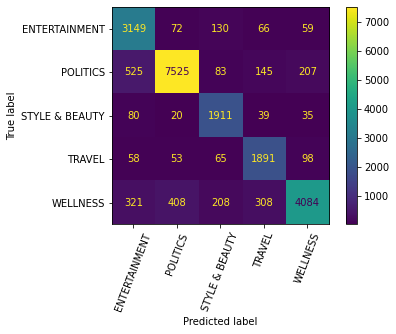

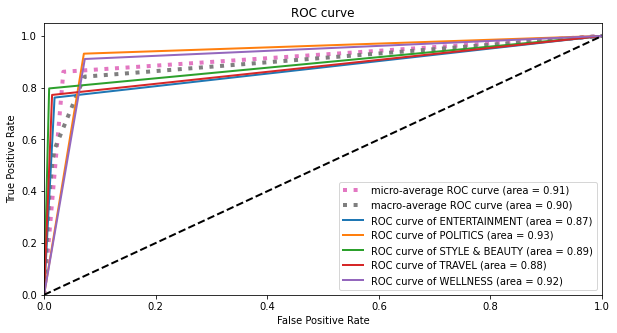

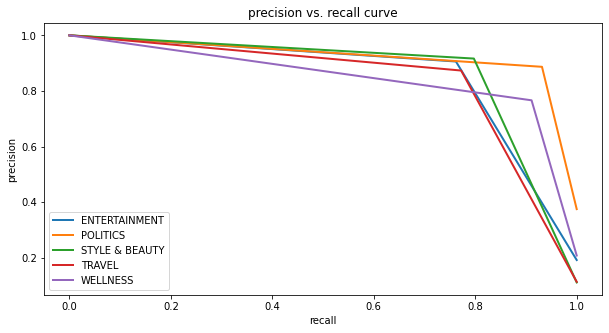

In [ ]:
pred_headline_rf = clf_rf.predict(tfidf_test_headline)
evaluator_rf = Evaluator(pred_headline_rf, Y_test, classes)
evaluator_rf.evaluate()

# kNN classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
"""
param_grid = { 
    #'weights': ['uniform', 'distance'], 
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}"""

clf_knn = KNeighborsClassifier(weights='distance')
# Stratified Kfold by default (cv)
"""clf_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=3,
                   scoring='balanced_accuracy', refit=True,
                   return_train_score=False, n_jobs=-1, verbose=1)
"""

clf_knn.fit(tfidf_train_headline, Y_train)

KNeighborsClassifier(weights='distance')

The accuracy of the model is: 0.32400185701021356
The balanced accuracy of the model is: 0.6279531243906813
The classification report of the model is: 
                precision    recall  f1-score   support

 ENTERTAINMENT       0.12      0.70      0.20       695
      POLITICS       0.15      0.75      0.26      1670
STYLE & BEAUTY       0.21      0.74      0.33       678
        TRAVEL       0.22      0.72      0.34       749
      WELLNESS       0.94      0.24      0.38     17748

      accuracy                           0.32     21540
     macro avg       0.33      0.63      0.30     21540
  weighted avg       0.80      0.32      0.36     21540

The confusion matrix is: 


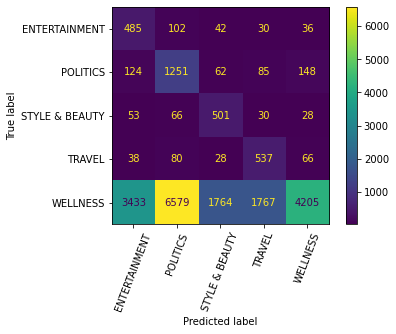

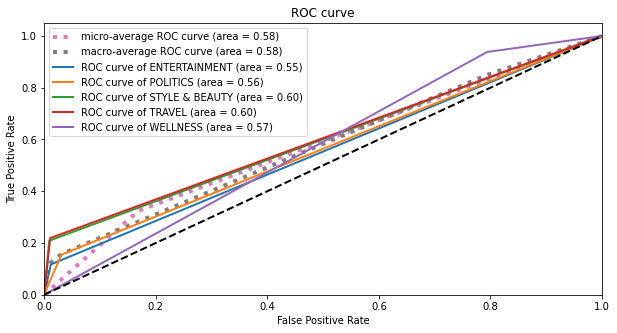

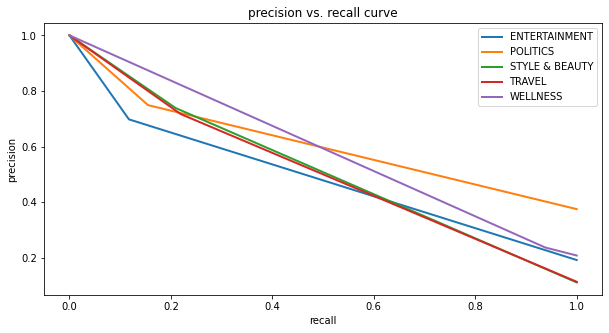

In [ ]:
pred_headline_knn = clf_knn.predict(tfidf_test_headline)

evaluator_knn = Evaluator(pred_headline_knn, Y_test, classes)
evaluator_knn.evaluate()

# Support Vectors Machine

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.svm import LinearSVC

param_grid = { 
    'penalty': ['l1', 'l2'],
    'loss' : ['hinge', 'squared_hinge'],
    'C': np.arange(0.1, 1.1, 0.1),
    'class_weight': ['balanced']
}

svc = LinearSVC(random_state=9)
# Stratified Kfold by default (cv)
clf_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=3,
                   scoring='balanced_accuracy', refit=True,
                   return_train_score=False, n_jobs=-1, verbose=1)


clf_svc.fit(tfidf_train_headline, Y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 120.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_classes.py", line 272, in fit
    sample_weight=sample_weight,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py", line 1185, in _fit_liblinear
    solver_type = _get_liblinear_solver_type(multi_class, penalty, loss, dual)
  File "/usr/loc

GridSearchCV(cv=3, estimator=LinearSVC(random_state=9), n_jobs=-1,
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'class_weight': ['balanced'],
                         'loss': ['hinge', 'squared_hinge'],
                         'penalty': ['l1', 'l2']},
             scoring='balanced_accuracy', verbose=1)

In [ ]:
print(clf_svc.best_params_)

{'C': 0.8, 'class_weight': 'balanced', 'loss': 'hinge', 'penalty': 'l2'}


In [ ]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=0.7, class_weight='balanced', loss='hinge', penalty='l2', random_state=9)
svc.fit(tfidf_train_headline, Y_train)

LinearSVC(C=0.7, class_weight='balanced', loss='hinge', random_state=9)

The accuracy of the model is: 0.8748375116063138
The balanced accuracy of the model is: 0.8602488581160708
The classification report of the model is: 
                precision    recall  f1-score   support

 ENTERTAINMENT       0.82      0.86      0.84      3960
      POLITICS       0.91      0.93      0.92      7905
STYLE & BEAUTY       0.87      0.85      0.86      2458
        TRAVEL       0.85      0.83      0.84      2502
      WELLNESS       0.87      0.83      0.85      4715

      accuracy                           0.87     21540
     macro avg       0.87      0.86      0.86     21540
  weighted avg       0.87      0.87      0.87     21540

The confusion matrix is: 


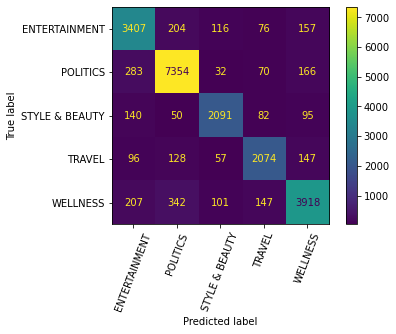

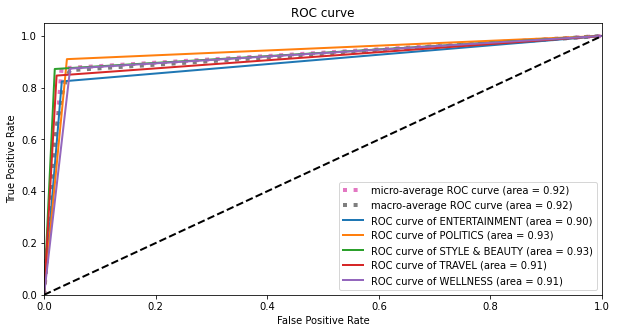

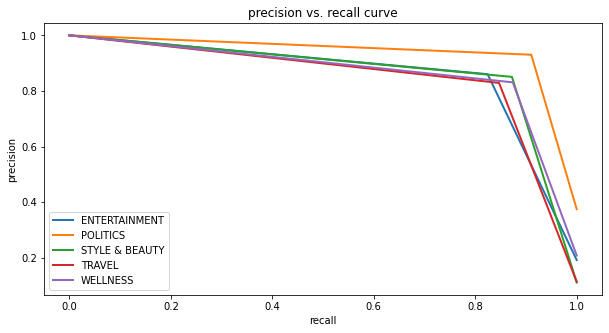

In [ ]:
tfidf_test_headline = tfidf.transform(X_test)
pred_headline_svc = svc.predict(tfidf_test_headline)

evaluator_svc = Evaluator(pred_headline_svc, Y_test, classes)
evaluator_svc.evaluate()

# Gradient Boost classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

"""parameters = {
    #"learning_rate": [0.01, 0.05, 0.1, 0.2],
    "criterion": ["friedman_mse",  "squared_error"],
    #"n_estimators":[10]
    }

clf_gbc = GridSearchCV(GradientBoostingClassifier(random_state=9), parameters, cv=3, verbose=1)
"""
clf_gbc = GradientBoostingClassifier(random_state=9)
clf_gbc.fit(tfidf_train_headline, Y_train)

GradientBoostingClassifier(random_state=9)

The accuracy of the model is: 0.32386258124419687
The balanced accuracy of the model is: 0.6241688440710988
The classification report of the model is: 
                precision    recall  f1-score   support

 ENTERTAINMENT       0.12      0.69      0.20       711
      POLITICS       0.15      0.74      0.26      1681
STYLE & BEAUTY       0.21      0.73      0.32       680
        TRAVEL       0.22      0.72      0.34       744
      WELLNESS       0.94      0.24      0.38     17724

      accuracy                           0.32     21540
     macro avg       0.33      0.62      0.30     21540
  weighted avg       0.80      0.32      0.36     21540

The confusion matrix is: 


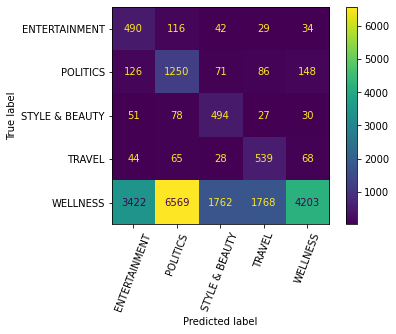

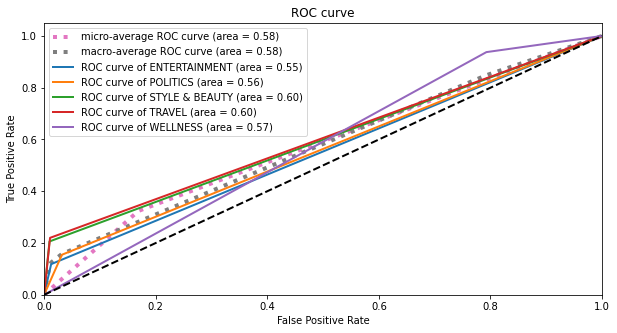

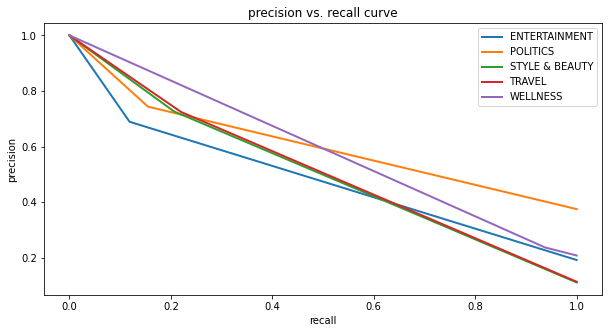

In [ ]:
pred_headline_gbc = clf_knn.predict(tfidf_test_headline)

evaluator_gbc = Evaluator(pred_headline_gbc, Y_test, classes)
evaluator_gbc.evaluate()

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

clf_lr = LogisticRegression()
"""param_grid = { 
    'alpha': np.arange(0, 1, 0.5),
    'fit_prior' : ['True', 'False'],
    'binarize' : ['True', 'False']
}
clf_lr = GridSearchCV(estimator=lr, param_grid=param_grid, cv= 5,
                   scoring='balanced_accuracy', refit=True,
                   return_train_score=False, n_jobs=-1, verbose=1)"""


clf_lr.fit(tfidf_train_headline, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
pred_headline_lr = clf_lr.predict(tfidf_test_headline)

print(accuracy_score(Y_test, pred_headline_lr))
print(balanced_accuracy_score(Y_test, pred_headline_lr))
print(classification_report(Y_test, pred_headline_lr))

0.8662488393686165
0.8412356011121236
                precision    recall  f1-score   support

 ENTERTAINMENT       0.85      0.81      0.83      4133
      POLITICS       0.89      0.93      0.91      8078
STYLE & BEAUTY       0.90      0.81      0.85      2397
        TRAVEL       0.88      0.77      0.83      2449
      WELLNESS       0.82      0.87      0.84      4483

      accuracy                           0.87     21540
     macro avg       0.87      0.84      0.85     21540
  weighted avg       0.87      0.87      0.87     21540



# Multinomial Naive Bayes classifier

In [ ]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
param_grid = { 
    'alpha': np.arange(0, 1, 0.5),
    'fit_prior' : ['True', 'False'],
}
mnb_model = GridSearchCV(estimator=mnb, param_grid=param_grid, cv= 5,
                   scoring='balanced_accuracy', refit=True,
                   return_train_score=False, n_jobs=-1, verbose=1)


mnb_model.fit(tfidf_train_headline, Y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=MultinomialNB(), n_jobs=-1,
             param_grid={'alpha': array([0. , 0.5]),
                         'fit_prior': ['True', 'False']},
             scoring='balanced_accuracy', verbose=1)

In [ ]:
pred_headline_mnb = clf_lr.predict(tfidf_test_headline)

print(accuracy_score(Y_test, pred_headline_mnb))
print(balanced_accuracy_score(Y_test, pred_headline_mnb))
print(classification_report(Y_test, pred_headline_mnb))

0.8662488393686165
0.8412356011121236
                precision    recall  f1-score   support

 ENTERTAINMENT       0.85      0.81      0.83      4133
      POLITICS       0.89      0.93      0.91      8078
STYLE & BEAUTY       0.90      0.81      0.85      2397
        TRAVEL       0.88      0.77      0.83      2449
      WELLNESS       0.82      0.87      0.84      4483

      accuracy                           0.87     21540
     macro avg       0.87      0.84      0.85     21540
  weighted avg       0.87      0.87      0.87     21540

